# TS3: Análisis de Fourier: FFT, desparramo, interpolación y ventaneo.

## Alumno: Matías Carbajal

## Introduccion teorica:

### El análisis espectral de señales en tiempo discreto se realiza mediante la Transformada Discreta de Fourier (DFT), la cual puede calcularse eficientemente con la FFT.
### La DFT muestrea el espectro continuo (DTFT) en N puntos igualmente espaciados, con resolución de frecuencia $\Delta f = \frac{f_s}{N}.$

### Efecto de desparramo (spectral leakage).

### Cuando la frecuencia de una senoidal no coincide exactamente con un múltiplo entero de $\Delta f$ la energía espectral no se concentra en un solo bin, sino que se “desparrama” entre varios, generando lóbulos secundarios

### Parseval y potencia unitaria: Según el teorema de Parseval, la energía de una señal en el dominio temporal es equivalente a la energía distribuida en el dominio frecuencial


### Zero-padding e interpolación: El zero padding consiste en agregar ceros a la señal en el tiempo antes de aplicar la FFT. Esto no altera el espectro verdadero, pero aumenta la densidad de muestreo en frecuencia, generando una visualización más suave y detallada


### En esta tarea semanal analizaremos un fenómeno muy particular que se da al calcular la DFT, el efecto de desparramo espectral. 

## Análisis y desarrollo:

### 1) Senoidal de frecuencia $f_0 = k_0 \cdot \frac{f_s}{N} = k_0 \cdot \Delta f$
### potencia normalizada, es decir energía (o varianza) unitaria
### 1.a a)  La frecuencia correspondiente al índice $\ k_0 $ es: $f_0 = k_0 \cdot \frac{f_s}{N} = k_0 \cdot \Delta f$

### Sea $ k_0 $ tal que:

$$
k_0 =
\begin{cases}
\dfrac{N}{4} \\
\dfrac{N}{4} + 0.25 \\
\dfrac{N}{4} + 0.5
\end{cases}
$$

 

### Parametros.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def mi_funcion_sin(vmax=1.0, dc=0.0, ff=1.0, ph=0.0, nn=1000, fs=1000.0, como_columna=True):
    tt = np.arange(nn, dtype=float) /(fs)
    xx = dc + vmax * np.sin(2 * np.pi * ff * tt + ph)
    return tt, xx

N=1000
fs=N
df=fs/N
ts=1/fs

### Funciones.

In [3]:
amplitud = np.sqrt(2)
#-----------------------------------------------------------
k0 = N/4                 
tt_0,xx_0=mi_funcion_sin(vmax=amplitud, dc=0, ff=k0*df, ph=0, nn=N, fs=fs)##SEÑAL 0
X0 = fft(xx_0)
#-----------------------------------------------------------
k0 = (N/4) + 0.25
tt_1,xx_1 = mi_funcion_sin(vmax=amplitud, dc=0, ff=k0*df, ph=0, nn=N, fs=fs)##SEÑAL 1
#-----------------------------------------------------------
k0 = (N/4) + 0.5
tt_2,xx_2 = mi_funcion_sin(vmax=amplitud, dc=0, ff=k0*df, ph=0, nn=N, fs=fs)##SEÑAL 2
#-----------------------------------------------------------


### Calculo de DFT ,argumentos y modulo.

In [4]:
X0 = fft(xx_0)
X0abs = np.abs(X0)
X0ang = np.angle(X0)

X1 = fft(xx_1)
X1abs = np.abs(X1)
X1ang = np.angle(X1)

X2 = fft(xx_2)
X2abs = np.abs(X2)
X2ang = np.angle(X2)



frec = np.arange(N)*df

### Graficos.

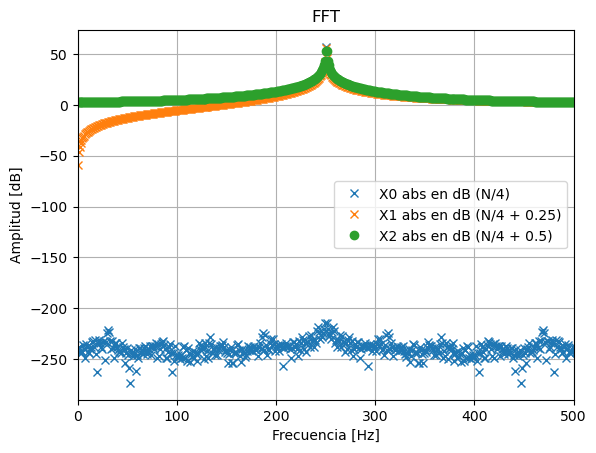

In [12]:
plt.figure(1)
plt.plot(frec,20*np.log10(X0abs),'x',label= 'X0 abs en dB (N/4)')
plt.plot(frec,20*np.log10(X1abs),'x',label= 'X1 abs en dB (N/4 + 0.25)')
plt.plot(frec,20*np.log10(X2abs),'o',label= 'X2 abs en dB (N/4 + 0.5)')
plt.xlim([0,fs/2])
#######
plt.title('FFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

### Se puede ver claramente en el grafico el desparramo en las señales X1 y X2 mientras que la señal X0 concentra toda su energia en un punto (en el  bin 250) mientras que las demas su energia se desparramo debido a que no cae en un bin sino entre dos bins.

### 1.b : Verificar la potencia unitaria de cada PSD, puede usar la identidad de Parseval. 

In [8]:
# Variancia en el dominio del tiempo
sigma2_0 = np.var(xx_0)
sigma2_1 = np.var(xx_1)
sigma2_2 = np.var(xx_2)

print("Varianza xx_0:", sigma2_0)
print("Varianza xx_1:", sigma2_1)
print("Varianza xx_2:", sigma2_2)

# Potencia usando Parseval en el dominio de la frecuencia
pot_X0 = np.sum(np.abs(X0)**2)/N
pot_X1 = np.sum(np.abs(X1)**2)/N
pot_X2 = np.sum(np.abs(X2)**2)/N

print("Potencia por Parseval X0:", pot_X0)
print("Potencia por Parseval X1:", pot_X1)
print("Potencia por Parseval X2:", pot_X2)

Varianza xx_0: 1.0
Varianza xx_1: 0.9989999999987679
Varianza xx_2: 0.9999980125269956
Potencia por Parseval X0: 1000.0000000000001
Potencia por Parseval X1: 998.9999999999995
Potencia por Parseval X2: 1000.0000000000006


## 2. Diferencias entre espectros de señales cercanas.

### Aunque la diferencia de frecuencia es mínima, sus espectros son muy distintos: La señal que cae exactamente en un bin de la DFT (ej. \( N/4 \)) concentra toda su energía en un solo punto del espectro → pico muy marcado. Las señales que no coinciden exactamente con un bin de la DFT (\( N/4 + 0.25 \), \( N/4 + 0.5 \)) muestran el efecto de **desparramo** (*spectral leakage*): la energía se reparte entre varios bins → el pico es menos definido y “se esparce” en frecuencia.
### Esto ocurre porque la DFT muestrea el espectro continuo (DTFT) en puntos discretos.  
### Si la frecuencia de la señal no coincide con un múltiplo exacto de $\[\Delta f = \frac{f_s}{N},\]$ la energía no se concentra en un solo bin.


### 1.c : Repetir el experimento mediante la técnica de zero padding. 

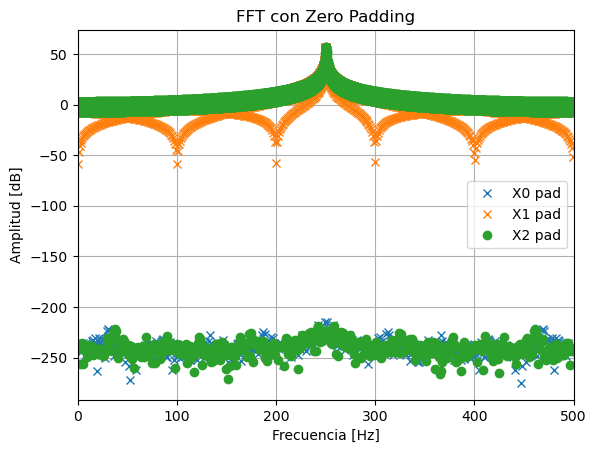

In [10]:
# Zero padding
Npad = 10*N  # 9*N ceros adicionales
xx0_pad = np.pad(xx_0, (0, 9*N), 'constant')
xx1_pad = np.pad(xx_1, (0, 9*N), 'constant')
xx2_pad = np.pad(xx_2, (0, 9*N), 'constant')

# FFT con más puntos
X0_pad = fft(xx0_pad)
X1_pad = fft(xx1_pad)
X2_pad = fft(xx2_pad)

# Nueva frecuencia
f_pad = np.arange(Npad)*(fs/Npad)

# Graficar
plt.figure()
plt.plot(f_pad, 20*np.log10(np.abs(X0_pad)),'x',label='X0 pad')
plt.plot(f_pad, 20*np.log10(np.abs(X1_pad)),'x',label='X1 pad')
plt.plot(f_pad, 20*np.log10(np.abs(X2_pad)),'o',label='X2 pad')
plt.xlim([0, fs/2])
plt.title('FFT con Zero Padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

### Al aplicar zero padding a la señal antes de calcular la FFT, no se modifica la energía ni la información de la señal, pero sí se incrementa la resolución en frecuencia del espectro. Esto permite apreciar con mayor claridad el desparramo (leakage) que ocurre cuando la frecuencia de la señal no coincide exactamente con un bin de la DFT.

## Conclusiones:
### Se puede concluir que la señal cuando no coincied con el multiplo de la $\Delta f$ se produce el fenomeno de desparramiento (leakage).La energia se desparrama por todo el eje de frecuencias.
### Este fenomeno se puede apreciar mejor si aplicamos la tecnica de zero padding que consiste en aumentar la resolucion espectral sin modificar la energia o la potencia de la señal.

### En esta practica no utilice IA me guie mucho con la clase de Mariano entendiendo el fenomeno de desparramiento y sobre la ventana implicita que tenemos, ademas del zero padding y los calculos de potencia y energia de una señal.